<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/EvaluateRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Evaluate the significance
*   Get a performance estimate
*   Validate the assumptions





In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import  statsmodels.api as sm
from scipy import stats
from sklearn import datasets, linear_model
from distutils.version import LooseVersion
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np



#Lack of Normality
A synthetic random regression problem is generated.The targets y are modified by : (i) translating all targets such that all entries are non - negative and (II) applying an exponential function to obtain non linear targets which cannot be fitted using a simple linear model.
Therefore a logarithmic (np.loglp) and an exponential function (np.expl) will be used to tranform the targets before training a linear regression model and using it for predicion
#Approach
Your approach involves creating a synthetic regression dataset using make_regression from scikit-learn, adding noise, applying an exponential transformation to the target variable y, and then transforming y using the natural logarithm plus one. The transformed target y_trans can then be used in a model. Here’s how you can implement this, along with a comparison of model performance with and without target transformation using LinearRegression and TransformedTargetRegressor.

Below is the complete code, including the generation of the synthetic data, fitting the models, making predictions, and plotting the results:

In [3]:
X, y = make_regression(n_samples=10000, noise=100, random_state=0)
y = np.exp((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

The following illustrates the probability density functions of the target before and after applying the logarithmic functions.

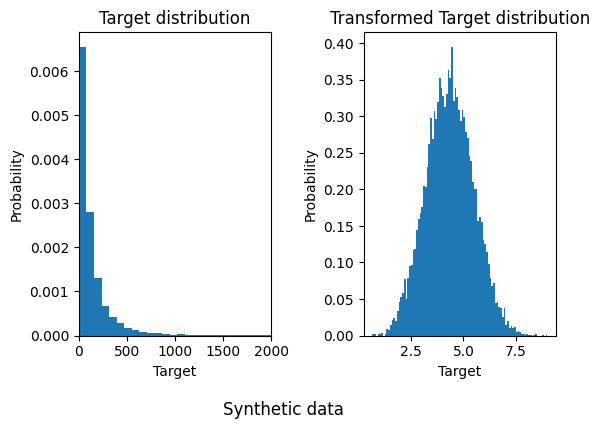

In [4]:
f,  (ax0,  ax1)  = plt.subplots(1, 2)

ax0.hist(y, bins=100, **{'density': True})
ax0.set_xlim([0, 2000])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')


ax1.hist(y_trans, bins=100, **{'density' : True})
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed Target distribution')


f.suptitle("Synthetic data", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95,0.95])

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0)

#Explanation:
Imports:

numpy for numerical operations.
matplotlib.pyplot for plotting.
load_diabetes for loading the dataset.
train_test_split for splitting the data into training and testing sets.
LinearRegression for the linear model.
TransformedTargetRegressor for applying transformations to the target variable.
r2_score and median_absolute_error for performance metrics.
Data Preparation:

The diabetes dataset is loaded and split into training and testing sets using an 80/20 split.
Linear Regression Model:

A LinearRegression model is fit to the training data and predictions are made on the test data.
The scatter plot of true vs. predicted targets is created along with a reference line.
The R² and Median Absolute Error (MAE) are calculated and displayed on the plot.
TransformedTargetRegressor:

Another LinearRegression model is wrapped in a TransformedTargetRegressor to apply a log transformation to the target variable.
The model is fit to the training data and predictions are made on the test data.
Similar plots and metrics are created for this model.
Plot Configuration:

The plots are created side by side for comparison.
Titles, labels, and limits are set for each plot.
The overall layout is adjusted and the plots are displayed.
By running this code, you should be able to compare the performance of a linear regression model with and without target transformation on the diabetes dataset.








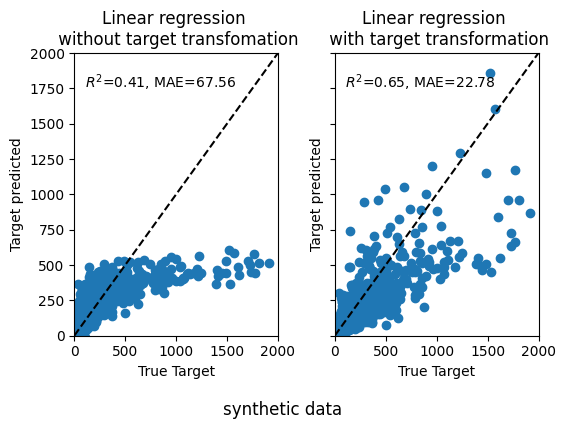

In [5]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

# Fit and predict with a simple Linear Regression model
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

# Plot for Linear Regression without target transformation
ax0.scatter(y_test,y_pred)
ax0.plot([0, 2000], [0, 2000], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Linear regression \n without target transfomation')
ax0.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' %(
    r2_score(y_test,y_pred), median_absolute_error(y_test,y_pred)))

ax0.set_xlim([0, 2000])
ax0.set_ylim([0, 2000])

# Fit and predict with Linear Regression with target transformation
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p,
                                        inverse_func=np.expm1)

# Create subplots
regr_trans.fit(x_train, y_train)
y_pred = regr_trans.predict(x_test)

# Plot for Linear Regression with target transformation
ax1.scatter(y_test, y_pred)
ax1.plot([0, 2000], [0, 2000], '--k')
ax1.set_ylabel('Target predicted')
ax1.set_xlabel('True Target')
ax1.set_title('Linear regression \n with target transformation')
ax1.text(100,1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test,y_pred)))
ax1.set_xlim([0, 2000])
ax0.set_ylim([0,2000])

# Set the super title and adjust layout
f.suptitle("synthetic data", y=0.035)
f.tight_layout(rect=[0.05,0.05,0.95,0.95])



Running this code will load the diabetes dataset, add a constant term to the features, fit an OLS regression model, and print out the summary of the regression results. This summary will include information such as coefficients, R-squared values, F-statistics, and p-values, which are useful for understanding the performance and significance of the model.








In [7]:
import statsmodels.api as sm
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Add a constant to the features matrix (for the intercept)
X2 = sm.add_constant(X)

# Create and fit the OLS model
est = sm.OLS(y, X2)
est2 = est.fit()

# Print the summary of the regression model
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 22 May 2024   Prob (F-statistic):           3.83e-62
Time:                        18:40:48   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0